In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import numpy as np
from imblearn.over_sampling import RandomOverSampler



import seaborn as sns

import scipy
from scipy.stats import chi2
from scipy.stats import chi2_contingency
from scipy.stats import pearsonr, spearmanr
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import tree
from sklearn.tree import export_graphviz

from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import  precision_recall_curve, roc_auc_score, confusion_matrix, accuracy_score, recall_score, precision_score, f1_score,auc, roc_curve, plot_confusion_matrix

from IPython.display import Image
import pydotplus
import matplotlib.pyplot as plt
%matplotlib inline
color = sns.color_palette()
seed = 42

In [2]:
url = 'https://raw.githubusercontent.com/N008Coder/Loan_Default_Predictor/main/Kaggle_loan_app/Loan_Default.csv'
df = pd.read_csv(url)
# Dataset is now stored in a Pandas Dataframe
df.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [3]:

# drop unnecesssary columns
df = df.drop(columns=['year','ID', 'loan_limit', 'approv_in_adv', 'Credit_Worthiness', 'open_credit', 'Interest_rate_spread', 'Upfront_charges', 'Neg_ammortization', 'construction_type','lump_sum_payment', 'total_units', 'submission_of_application', 'Security_Type', 'dtir1'])
df

,Gender,loan_type,loan_purpose,business_or_commercial,loan_amount,rate_of_interest,term,interest_only,property_value,occupancy_type,Secured_by,income,credit_type,Credit_Score,co-applicant_credit_type,age,LTV,Region,Status
0,Sex Not Available,type1,p1,nob/c,116500,NaN,360.0,not_int,118000.0,pr,home,1740.0,EXP,758,CIB,25-34,98.728814,south,1
1,Male,type2,p1,b/c,206500,NaN,360.0,not_int,NaN,pr,home,4980.0,EQUI,552,EXP,55-64,NaN,North,1
2,Male,type1,p1,nob/c,406500,4.560,360.0,not_int,508000.0,pr,home,9480.0,EXP,834,CIB,35-44,80.019685,south,0
3,Male,type1,p4,nob/c,456500,4.250,360.0,not_int,658000.0,pr,home,11880.0,EXP,587,CIB,45-54,69.376900,North,0
4,Joint,type1,p1,nob/c,696500,4.000,360.0,not_int,758000.0,pr,home,10440.0,CRIF,602,EXP,25-34,91.886544,North,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,Sex Not Available,type1,p3,nob/c,436500,3.125,180.0,not_int,608000.0,pr,home,7860.0,CIB,659,EXP,55-64,71.792763,south,0
148666,Male,type1,p1,nob/c,586500,5.190,360.0,not_int,788000.0,ir,home,7140.0,CIB,569,CIB,25-34,74.428934,south,0
148667,Male,type1,p4,nob/c,446500,3.125,180.0,not_int,728000.0,pr,home,6900.0,CIB,702,EXP,45-54,61.332418,North,0
148668,Female,type1,p4,nob/c,196500,3.500,180.0,not_int,278000.0,pr,home,7140.0,EXP,737,EXP,55-64,70.683453,North,0


In [4]:
# Create column with N/A count

#df["NA count"] = 0
#len(df.index)


In [5]:
# add N/A column

#for i in range(len(df.index)):
  #df.loc[i, 31] = df.loc[i].isnull().sum()
# df

In [6]:
# review data
sum_stats=df.describe().round(2)
sum_stats

,loan_amount,rate_of_interest,term,property_value,income,Credit_Score,LTV,Status
count,148670.00,112231.00,148629.00,133572.00,139520.00,148670.00,133572.00,148670.00
mean,331117.74,4.05,335.14,497893.47,6957.34,699.79,72.75,0.25
std,183909.31,0.56,58.41,359935.32,6496.59,115.88,39.97,0.43
min,16500.00,0.00,96.00,8000.00,0.00,500.00,0.97,0.00
25%,196500.00,3.62,360.00,268000.00,3720.00,599.00,60.47,0.00
50%,296500.00,3.99,360.00,418000.00,5760.00,699.00,75.14,0.00
75%,436500.00,4.38,360.00,628000.00,8520.00,800.00,86.18,0.00
max,3576500.00,8.00,360.00,16508000.00,578580.00,900.00,7831.25,1.00


In [7]:
# check the column headings
list(df)

['Gender',
 'loan_type',
 'loan_purpose',
 'business_or_commercial',
 'loan_amount',
 'rate_of_interest',
 'term',
 'interest_only',
 'property_value',
 'occupancy_type',
 'Secured_by',
 'income',
 'credit_type',
 'Credit_Score',
 'co-applicant_credit_type',
 'age',
 'LTV',
 'Region',
 'Status']

In [8]:
print(df.isnull().sum())

Gender                          0
loan_type                       0
loan_purpose                  134
business_or_commercial          0
loan_amount                     0
rate_of_interest            36439
term                           41
interest_only                   0
property_value              15098
occupancy_type                  0
Secured_by                      0
income                       9150
credit_type                     0
Credit_Score                    0
co-applicant_credit_type        0
age                           200
LTV                         15098
Region                          0
Status                          0
dtype: int64


In [9]:
# data clean up 
df = df.drop(columns=['rate_of_interest'])
df.round({"term":0, "property_value":0})
## ask group about replacing property value with avg of column 
# df =  
df.head()
df.dtypes

Gender                       object
loan_type                    object
loan_purpose                 object
business_or_commercial       object
loan_amount                   int64
term                        float64
interest_only                object
property_value              float64
occupancy_type               object
Secured_by                   object
income                      float64
credit_type                  object
Credit_Score                  int64
co-applicant_credit_type     object
age                          object
LTV                         float64
Region                       object
Status                        int64
dtype: object

In [10]:

# df = df.astype({'term':'float', 'loan_amount':'float','property_value':'float','income':'float','Credit_Score':'float'})
# df.dtypes

In [11]:
# Main stats of categoric attributes:
print(df.describe(include=[np.object]))

# define categories
cats = df.dtypes[df.dtypes=='object'].index
cats



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


        Gender loan_type loan_purpose business_or_commercial interest_only  \
count   148670    148670       148536                 148670        148670   
unique       4         3            4                      2             2   
top       Male     type1           p3                  nob/c       not_int   
freq     42346    113173        55934                 127908        141560   

       occupancy_type Secured_by credit_type co-applicant_credit_type     age  \
count          148670     148670      148670                   148670  148470   
unique              3          2           4                        2       7   
top                pr       home         CIB                      CIB   45-54   
freq           138201     148637       48152                    74392   34720   

        Region  
count   148670  
unique       4  
top      North  
freq     74722  


Index(['Gender', 'loan_type', 'loan_purpose', 'business_or_commercial',
       'interest_only', 'occupancy_type', 'Secured_by', 'credit_type',
       'co-applicant_credit_type', 'age', 'Region'],
      dtype='object')

In [12]:
# Type of variables:
df.dtypes.sort_values(ascending=True)


Status                        int64
loan_amount                   int64
Credit_Score                  int64
LTV                         float64
term                        float64
property_value              float64
income                      float64
age                          object
co-applicant_credit_type     object
credit_type                  object
Gender                       object
Region                       object
interest_only                object
business_or_commercial       object
loan_purpose                 object
loan_type                    object
Secured_by                   object
occupancy_type               object
dtype: object

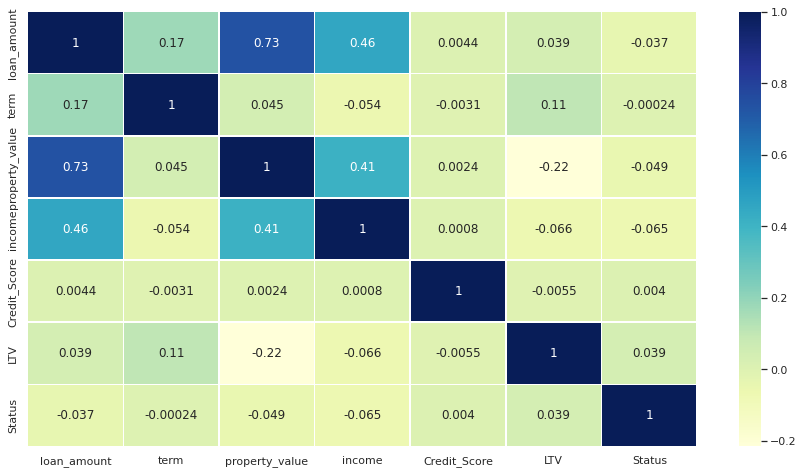

In [13]:
# correlation matrix

core = df.corr()
sns.set(rc = {'figure.figsize':(15,8)}, style="whitegrid")
sns.heatmap(
    core, 
    xticklabels = core.columns, 
    yticklabels = core.columns,
    annot=True,
    linewidth=.5,
    cmap="YlGnBu"
)


count     148670
unique         4
top        North
freq       74722
Name: Region, dtype: object

Approximately half of the loans originated in the North. Winter is coming...


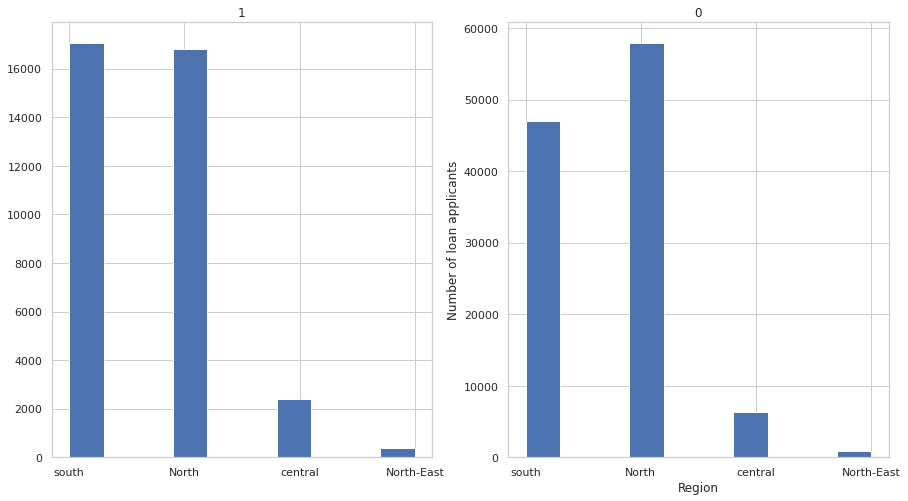

In [14]:
# status + region
display(df['Region'].describe())

print("Approximately half of the loans originated in the North. Winter is coming...")

# correlation = df["Status"].corr(df['Region'])

# correlation 

# x = df["Region"]
# y = df[ "Status"]

# xy = x.corr(y)
# print(xy)             

# yx = y.corr(x)
# print(yx)

# xys = x.corr(y, method='spearman')
# print(xys)  # Spearman's rho

# xyk = x.corr(y, method='kendall')
# print(xyk) #Kendall's


# plot 
fig, ax=plt.subplots(1, 2)
plot_count=0
plt.xlabel('Region')
plt.ylabel('Number of loan applicants')
for status in df['Status'].unique(): 
    df[df['Status']==status].Region.hist(ax=ax[plot_count])
    ax[plot_count].set_title(status)
    plot_count+=1
    # Add x-axis label

   


count     148670
unique         4
top         Male
freq       42346
Name: Gender, dtype: object

Males are more likely to default on their loans and married couples are most likely not to default


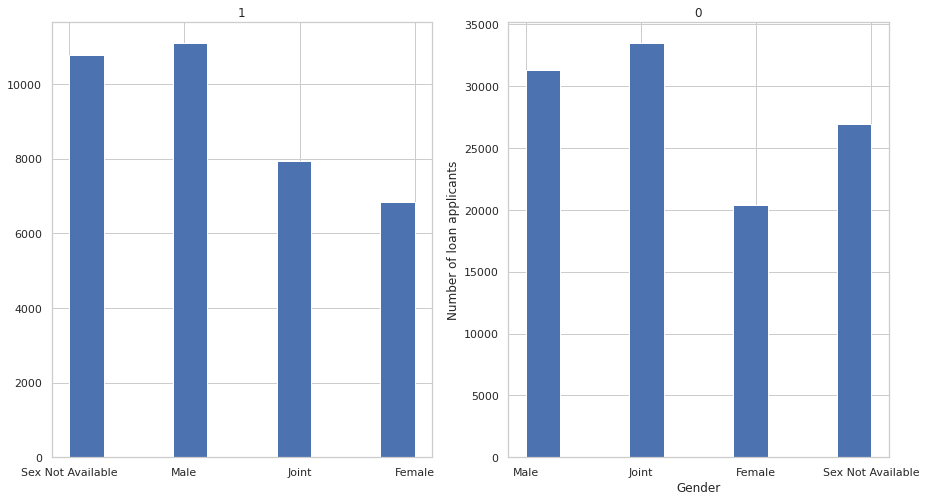

In [15]:
# status + gender
display(df['Gender'].describe())

print("Males are more likely to default on their loans and married couples are most likely not to default")

# correlation = df["Status"].corr(df['Region'])

# correlation 

# plot 
fig, ax=plt.subplots(1, 2)
plt.xlabel('Gender')
plt.ylabel('Number of loan applicants')
plot_count=0
for status in df['Status'].unique(): 
    df[df['Status']==status].Gender.hist(ax=ax[plot_count])
    ax[plot_count].set_title(status)
    plot_count+=1

In [16]:
# groupby different cats to see
df.groupby(['Status', 'Gender','loan_amount']).mean()

term  property_value  \
Status Gender            loan_amount                               
0      Female            26500        360.000000    9.800000e+04   
                         36500        328.235294    1.380000e+05   
                         46500        327.272727    1.139091e+05   
                         56500        335.917808    1.914932e+05   
                         66500        317.872340    1.423972e+05   
...                                          ...             ...   
1      Sex Not Available 2406500      360.000000    3.008000e+06   
                         2596500      360.000000             NaN   
                         2606500      360.000000    4.608000e+06   
                         3006500      360.000000    3.508000e+06   
                         3346500      360.000000             NaN   

                                            income  Credit_Score        LTV  
Status Gender            loan_amount                                         
0      Female            26500         1720.000000    703.000000  47.899979  
                         36500         1722.352941    682.352941  43.663327  
                         46500         2010.000000    697.318182  67.028490  
                         56500         2362.191781    703.328767  51.490940  
                         66500         2275.714286    699.248227  62.964384  
...                                            ...           ...        ...  
1      Sex Not Available 2406500      27840.000000    710.000000  80.003324  
                         2596500      13080.000000    803.000000        NaN  
                         2606500      23820.000000    526.000000  56.564670  
                         3006500      78660.000000    642.500000  85.704105  
                         3346500      33840.000000    538.000000        NaN  

[1149 rows x 5 columns]

0    112031
1     36639
Name: Status, dtype: int64
count     148470
unique         7
top        45-54
freq       34720
Name: age, dtype: object
0         25-34
1         55-64
2         35-44
3         45-54
4         25-34
          ...  
148665    55-64
148666    25-34
148667    45-54
148668    55-64
148669    45-54
Name: age, Length: 148670, dtype: object


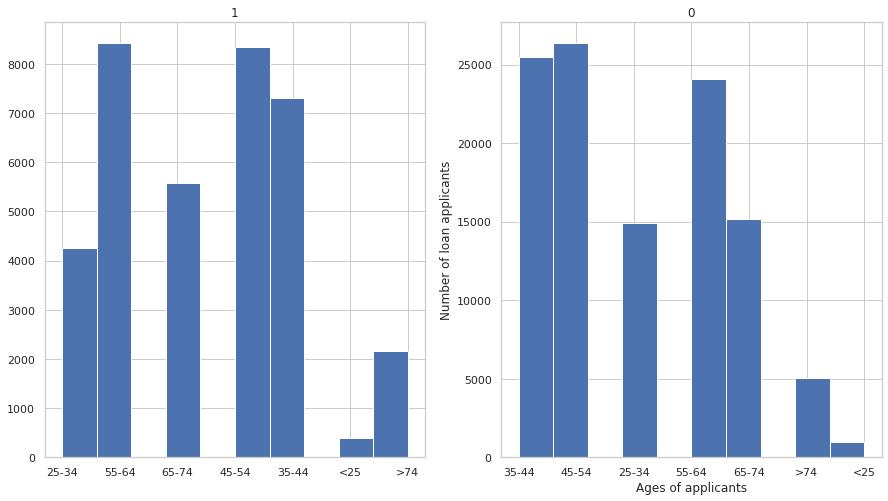

In [17]:
# age + status
print(df.Status.value_counts())
print(df.age.describe())

print(df['age'])

# plot 
fig, ax=plt.subplots(1, 2)
plt.xlabel('Ages of applicants')
plt.ylabel('Number of loan applicants')
plot_count=0
for status in df['Status'].unique(): 
    df[df['Status']==status].age.hist(ax=ax[plot_count])
    ax[plot_count].set_title(status)
    plot_count+=1

# replace age ranges with group #
# age group 1 = 25-34
# age group 2 = 35-44
# age group 3 = 45-54
# age group 4 = 55-64
# age group 5 = 65-74

# df['age'] = df['age'].replace(['<25','25-34','35-44','45-54','55-64','65-74','>74'],['1','2','3','4', '5','6', '7'])
# df['age'].isnull().sum()
# 200 NaNs in age, so I dropped 
# df['age'].dropna()


#correlation = df["Status"].corr(df['age'])

# correlation 


# change type
# df = df.astype({'Status':'float'})









In [18]:
# groupby different cats to see
df.groupby(['age', 'loan_type','Region']).mean().round(1)

loan_amount   term  property_value  income  \
age   loan_type Region                                                   
25-34 type1     North          364922.2  349.2        463033.4  6915.8   
                North-East     315488.8  343.0        382050.6  5340.0   
                central        398776.3  351.7        505206.9  7654.9   
                south          384418.9  343.5        515187.7  7132.8   
      type2     North          278772.5  356.0        305699.0  4539.2   
...                                 ...    ...             ...     ...   
>74   type2     south          160190.5  341.0        241271.9  2596.7   
      type3     North          277428.0  349.2        371846.2  3537.2   
                North-East     297088.2  356.5        364666.7  8286.0   
                central        323101.9  347.7        399931.8  3999.2   
                south          267508.1  349.5        362362.9  3662.2   

                            Credit_Score   LTV  Status  
age   loan_type Region                                  
25-34 type1     North              702.1  81.2     0.2  
                North-East         676.2  82.8     0.2  
                central            699.4  81.6     0.2  
                south              701.6  77.6     0.2  
      type2     North              696.7  91.9     0.3  
...                                  ...   ...     ...  
>74   type2     south              701.7  71.0     0.4  
      type3     North              692.9  80.0     0.3  
                North-East         679.4  82.7     0.5  
                central            712.4  83.7     0.4  
                south              702.4  79.2     0.3  

[83 rows x 7 columns]

count     148670.0
mean      331118.0
std       183909.0
min        16500.0
25%       196500.0
50%       296500.0
75%       436500.0
max      3576500.0
Name: loan_amount, dtype: float64

The max loan amount is $3576500.00 and the min loan amount is $16500.00


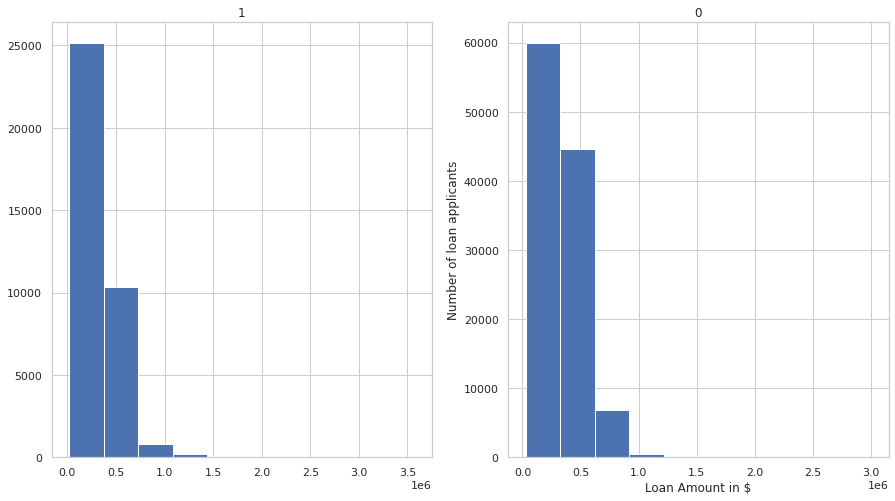

In [19]:
# status + loan amount
display(df['loan_amount'].describe().round())

print("The max loan amount is $3576500.00 and the min loan amount is $16500.00"  )

# plot 
fig, ax=plt.subplots(1, 2)
plt.xlabel('Loan Amount in $')
plt.ylabel('Number of loan applicants')
plot_count=0
for status in df['Status'].unique(): 
    df[df['Status']==status].loan_amount.hist(ax=ax[plot_count])
    ax[plot_count].set_title(status)
    plot_count+=1

count     148536
unique         4
top           p3
freq       55934
Name: loan_purpose, dtype: object

Hard to say which ones were more likely to default


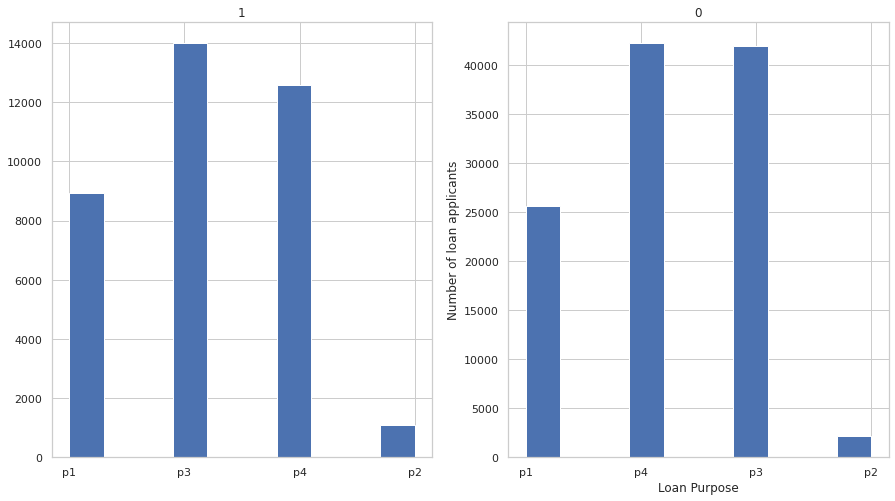

In [ ]:
# status + loan_purpose
display(df['loan_purpose'].describe())

print("Hard to say which ones were more likely to default" )

# plot 
fig, ax=plt.subplots(1, 2)
plt.xlabel('Loan Purpose')
plt.ylabel('Number of loan applicants')
plot_count=0
for status in df['Status'].unique(): 
    df[df['Status']==status].loan_purpose.hist(ax=ax[plot_count])
    ax[plot_count].set_title(status)
    plot_count+=1

count     148670
unique         2
top        nob/c
freq      127908
Name: business_or_commercial, dtype: object

The most common type of loan is the nob/c loan


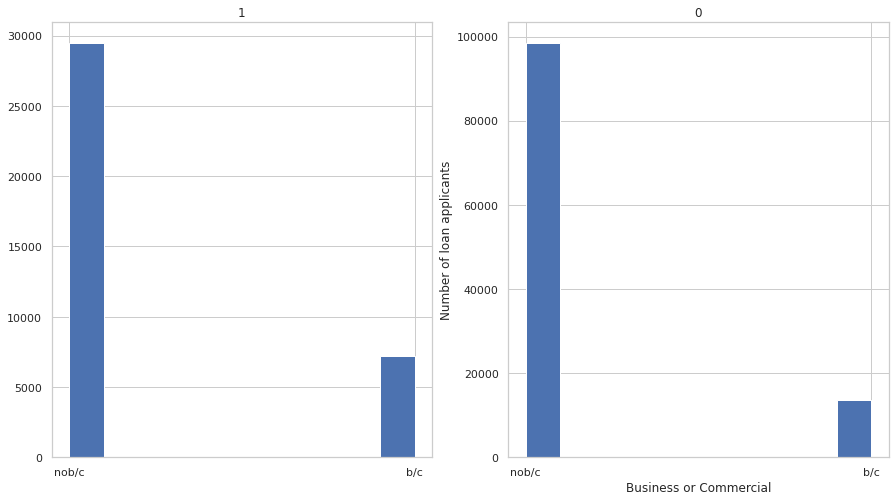

In [ ]:
 # status + business_or_commercial
display(df['business_or_commercial'].describe())

print("The most common type of loan is the nob/c loan" )

# plot 
fig, ax=plt.subplots(1, 2)
plt.xlabel('Business or Commercial')
plt.ylabel('Number of loan applicants')
plot_count=0
for status in df['Status'].unique(): 
    df[df['Status']==status].business_or_commercial.hist(ax=ax[plot_count])
    ax[plot_count].set_title(status)
    plot_count+=1

count    148629.000000
mean        335.136582
std          58.409084
min          96.000000
25%         360.000000
50%         360.000000
75%         360.000000
max         360.000000
Name: term, dtype: float64

The average term of a loan is 335.2 days. The min is 96 days and the max is 360 days.


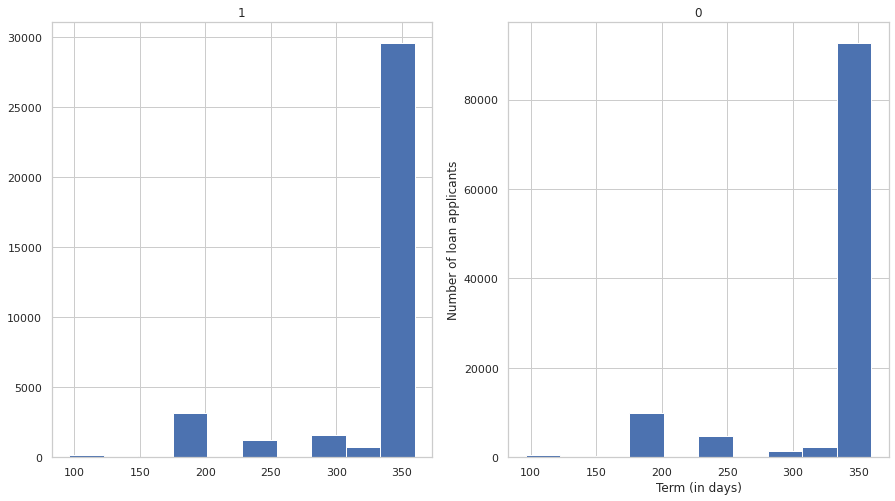

In [ ]:
# status + term
display(df['term'].describe())

print("The average term of a loan is 335.2 days. The min is 96 days and the max is 360 days." )

# plot 
fig, ax=plt.subplots(1, 2)
plt.xlabel('Term (in days)')
plt.ylabel('Number of loan applicants')
plot_count=0
for status in df['Status'].unique(): 
    df[df['Status']==status].term.hist(ax=ax[plot_count])
    ax[plot_count].set_title(status)
    plot_count+=1

count      148670
unique          2
top       not_int
freq       141560
Name: interest_only, dtype: object

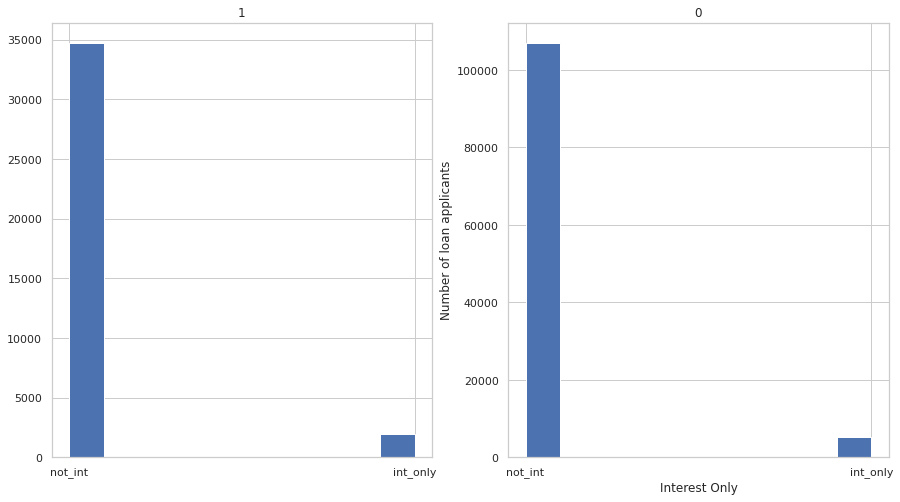

In [ ]:
# status + interest_only
display(df['interest_only'].describe())

# print("The average term of a loan is 335.2 days. The min is 96 days and the max is 360 days." )

# plot 
fig, ax=plt.subplots(1, 2)
plt.xlabel('Interest Only')
plt.ylabel('Number of loan applicants')
plot_count=0
for status in df['Status'].unique(): 
    df[df['Status']==status].interest_only.hist(ax=ax[plot_count])
    ax[plot_count].set_title(status)
    plot_count+=1

count      133572.0
mean       497893.0
std        359935.0
min          8000.0
25%        268000.0
50%        418000.0
75%        628000.0
max      16508000.0
Name: property_value, dtype: float64

The average property value of the customer is $497,893.00


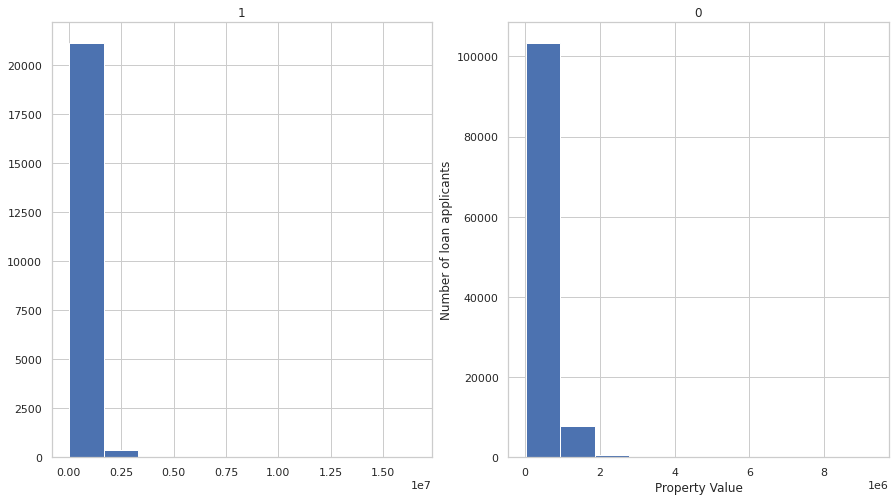

In [ ]:
# status + property_value
display(df['property_value'].describe().round())

print("The average property value of the customer is $497,893.00" )

# plot 
fig, ax=plt.subplots(1, 2)
plt.xlabel('Property Value')
plt.ylabel('Number of loan applicants')
plot_count=0
for status in df['Status'].unique(): 
    df[df['Status']==status].property_value.hist(ax=ax[plot_count])
    ax[plot_count].set_title(status)
    plot_count+=1

count     148670
unique         3
top           pr
freq      138201
Name: occupancy_type, dtype: object

The most common occupancy type is pr


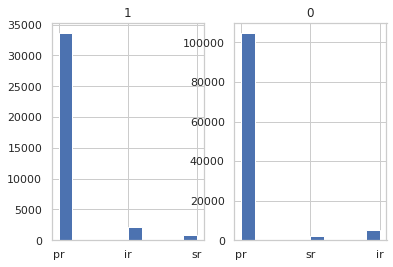

In [ ]:
# status + occupancy_type
display(df['occupancy_type'].describe())

print("The most common occupancy type is pr" )

# plot 
fig, ax=plt.subplots(1, 2)
plot_count=0
for status in df['Status'].unique(): 
    df[df['Status']==status].occupancy_type.hist(ax=ax[plot_count])
    ax[plot_count].set_title(status)
    plot_count+=1

count     148670
unique         2
top         home
freq      148637
Name: Secured_by, dtype: object

0

The most way people secure a loan is by using their house as collateral.


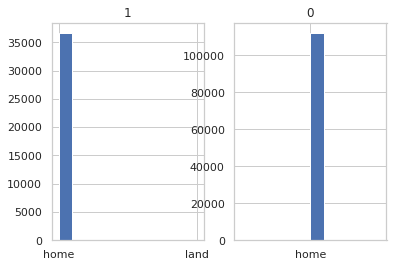

In [ ]:
# status + Secured_by
display(df['Secured_by'].describe())
display(df['Secured_by'].isnull().sum())

print("The most way people secure a loan is by using their house as collateral." )

# plot 
fig, ax=plt.subplots(1, 2)
plot_count=0
for status in df['Status'].unique(): 
    df[df['Status']==status].Secured_by.hist(ax=ax[plot_count])
    ax[plot_count].set_title(status)
    plot_count+=1

count    139520.000000
mean       6957.338876
std        6496.586382
min           0.000000
25%        3720.000000
50%        5760.000000
75%        8520.000000
max      578580.000000
Name: income, dtype: float64

9150

The average monthly income of the person requesting the loan is $6957.33.


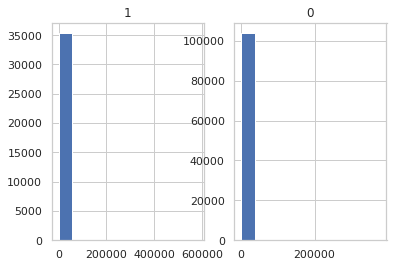

In [ ]:
# status + income
display(df['income'].describe())
display(df['income'].isnull().sum())

print("The average monthly income of the person requesting the loan is $6957.33." )

# plot 
fig, ax=plt.subplots(1, 2)
plot_count=0
for status in df['Status'].unique(): 
    df[df['Status']==status].income.hist(ax=ax[plot_count])
    ax[plot_count].set_title(status)
    plot_count+=1

count     148670
unique         4
top          CIB
freq       48152
Name: credit_type, dtype: object

0

The most common credit_type is CIB.


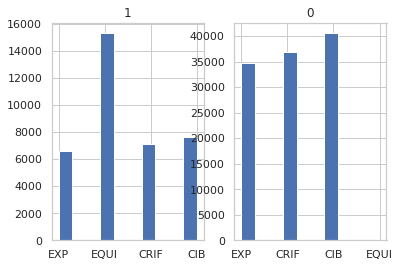

In [ ]:

# status + credit_type
display(df['credit_type'].describe())
display(df['credit_type'].isnull().sum())

print("The most common credit_type is CIB." )

# plot 
fig, ax=plt.subplots(1, 2)
plot_count=0
for status in df['Status'].unique(): 
    df[df['Status']==status].credit_type.hist(ax=ax[plot_count])
    ax[plot_count].set_title(status)
    plot_count+=1

count    148670.0
mean        700.0
std         116.0
min         500.0
25%         599.0
50%         699.0
75%         800.0
max         900.0
Name: Credit_Score, dtype: float64

0

The average Credit Score among applicants is 700.


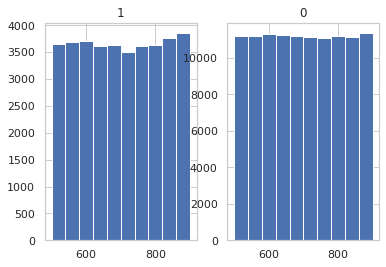

In [ ]:

# status + Credit_Score
display(df['Credit_Score'].describe().round())
display(df['Credit_Score'].isnull().sum())

print("The average Credit Score among applicants is 700." )

# plot 
fig, ax=plt.subplots(1, 2)
plot_count=0
for status in df['Status'].unique(): 
    df[df['Status']==status].Credit_Score.hist(ax=ax[plot_count])
    ax[plot_count].set_title(status)
    plot_count+=1

In [ ]:
# change name of co-app credit type otherwise can't make figure out of it in the next step

df.rename(columns = {'co-applicant_credit_type':'co_applicant_credit_type'}, inplace = True)

count     148670
unique         2
top          CIB
freq       74392
Name: co_applicant_credit_type, dtype: object

0

The most common co-applicant credit type among applicants is CIB.


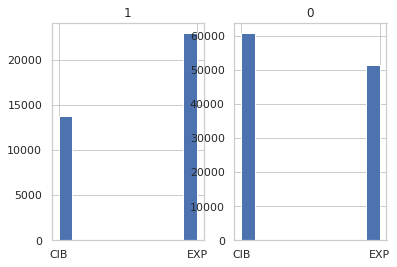

In [ ]:


# status + co_applicant_credit_type
display(df['co_applicant_credit_type'].describe())
display(df['co_applicant_credit_type'].isnull().sum())

print("The most common co-applicant credit type among applicants is CIB." )

# plot 
fig, ax=plt.subplots(1, 2)
plot_count=0
for status in df['Status'].unique(): 
    df[df['Status']==status].co_applicant_credit_type.hist(ax=ax[plot_count])
    ax[plot_count].set_title(status)
    plot_count+=1

In [ ]:
# Type of variables:
print( df.dtypes.sort_values(ascending=True))


x = df["loan_amount"]
y = df[ "Credit_Score"]

xy = x.corr(y)
print(xy)       

yx = y.corr(x)
print(yx)

xys = x.corr(y, method='spearman')
print(xys)  # Spearman's rho

xyk = x.corr(y, method='kendall')
print(xyk) #Kendall's





Status                        int64
loan_amount                   int64
Credit_Score                  int64
LTV                         float64
term                        float64
property_value              float64
income                      float64
age                          object
co-applicant_credit_type     object
credit_type                  object
Gender                       object
Region                       object
interest_only                object
business_or_commercial       object
loan_purpose                 object
loan_type                    object
Secured_by                   object
occupancy_type               object
dtype: object
0.004438286387009901
0.0044382863870099
0.004612210336209023
0.0031047984963710625


In [ ]:
x = df["loan_amount"]
y = df[ "Status"]

xy = x.corr(y)
print(xy)             

yx = y.corr(x)
print(yx)

xys = x.corr(y, method='spearman')
print(xys)  # Spearman's rho

xyk = x.corr(y, method='kendall')
print(xyk) #Kendall's



-0.036825275544374286
-0.03682527554437429
-0.06884161419818988
-0.056716892874696945


In [ ]:

x = df["Credit_Score"]
y = df[ "term"]

# correlation 

xy = x.corr(y)
print(xy)             

yx = y.corr(x)
print(yx)

xys = x.corr(y, method='spearman')
print(xys)  # Spearman's rho

xyk = x.corr(y, method='kendall')
print(xyk) #Kendall's



-0.003149300864245136
-0.0031493008642451354
-0.004525543399853301
-0.00358401845583904


In [ ]:
# correlation between loan_amount and property_value
x = df["property_value"]
y = df[ "loan_amount"]

# correlation 

xy = x.corr(y)
print(xy)             

yx = y.corr(x)
print(yx)

xys = x.corr(y, method='spearman')
print(xys)  # Spearman's rho

xyk = x.corr(y, method='kendall')
print(xyk) #Kendall's


0.7342490169595315
0.7342490169595314
0.8572588082090675
0.7047863870416955
